## Objective

#### The objective is to analyze electricity demand patterns, pricing trends, weather impact, and anomalies to optimize forecasting and business strategies.

## Key Focus Areas

##### 1) Demand and Price Trends (Identify demand fluctuations and price correlations).
##### 2) Weather Impact Analysis (Find links between demand and weather conditions).
##### 3) Operational Efficiency & Special Events (Examine the impact of holidays & school days).
##### 4) Anomaly Detection & Outlier Analysis (Identify unusual demand spikes/drops).
##### 5) Revenue and Cost Optimization (Find opportunities to optimize costs).
##### 6) Advanced Temporal Feature Analysis (Study time-based patterns in demand).
##### 7) Correlation Analysis (Identifying relationships)

## Step 1: Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Step 2: Load the Dataset

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("complete_dataset.csv")

# Display basic information
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB
None
         date      demand        RRP  demand_pos_RRP  RRP_positive  \
0  2015-01-01   99635.030  

## Step 3: Exploratory Data Analysis (EDA)

### 1) Demand and Price Analysis

##### a) Visualizing Demand Trends Over Time

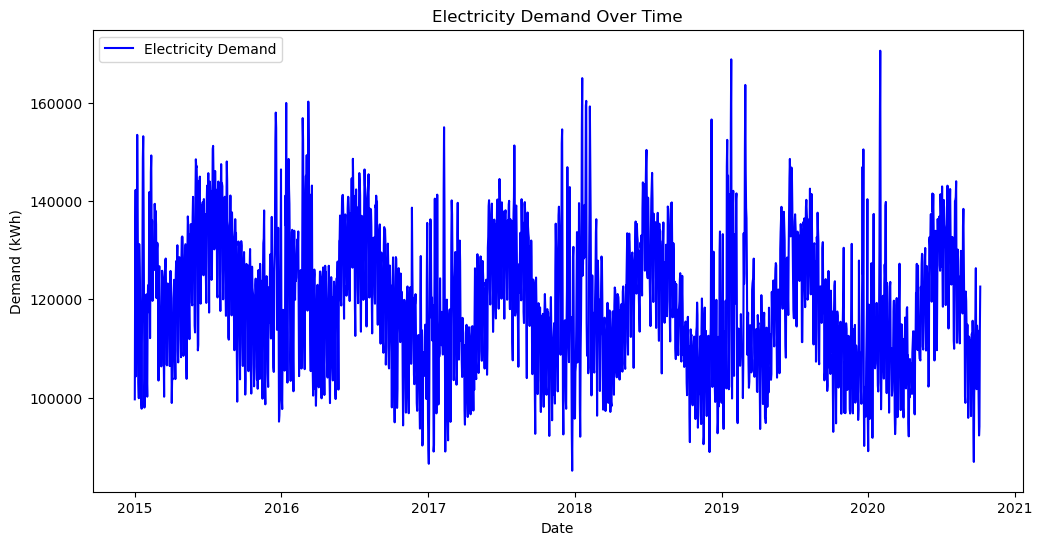

In [5]:
import matplotlib.pyplot as plt
df['date'] = pd.to_datetime(df['date'])  
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['demand'], label="Electricity Demand", color="blue")
plt.xlabel("Date")
plt.ylabel("Demand (kWh)")
plt.title("Electricity Demand Over Time")
plt.legend()
plt.show()

##### b) Average Electricity Demand by Month

Average Electricity Demand by Month:
month
1     119096.530054
2     119850.617706
3     116220.643871
4     112245.103556
5     120767.550995
6     131773.203694
7     131799.381022
8     128559.799140
9     117784.891083
10    112228.557702
11    113240.469833
12    113432.891581
Name: demand, dtype: float64


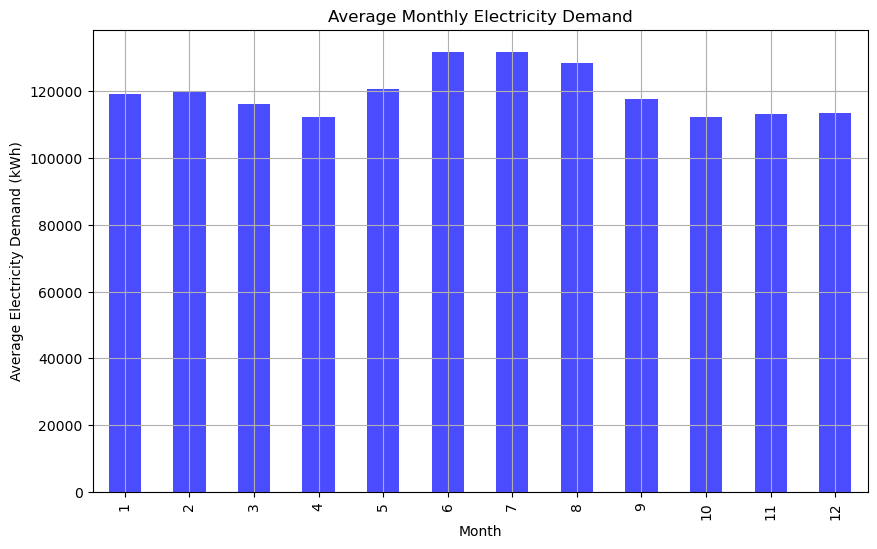

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
monthly_avg_demand = df.groupby('month')['demand'].mean()
print("Average Electricity Demand by Month:")
print(monthly_avg_demand)
plt.figure(figsize=(10,6))
monthly_avg_demand.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel("Month")
plt.ylabel("Average Electricity Demand (kWh)")
plt.title("Average Monthly Electricity Demand")
plt.grid(True)
plt.show()

##### c) Average Electricity Demand Per Week

C:\Users\thota\AppData\Local\Temp\ipykernel_7696\4044287599.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='demand', data=weekly_avg, palette="Greens_d")


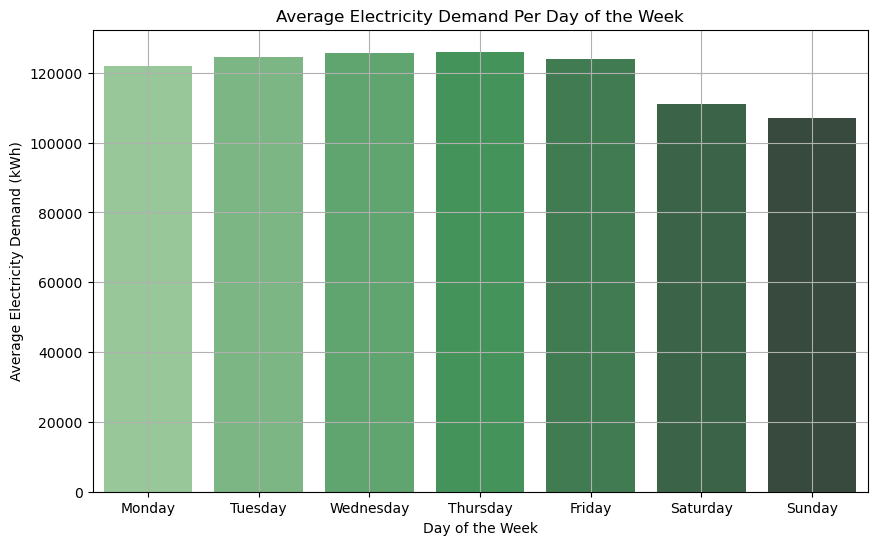

In [8]:
df['day_of_week'] = df['date'].dt.dayofweek
weekly_avg = df.groupby('day_of_week')['demand'].mean().reset_index()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_avg['day_of_week'] = weekly_avg['day_of_week'].apply(lambda x: days[x])
plt.figure(figsize=(10,6))
sns.barplot(x='day_of_week', y='demand', data=weekly_avg, palette="Greens_d")
plt.xlabel("Day of the Week")
plt.ylabel("Average Electricity Demand (kWh)")
plt.title("Average Electricity Demand Per Day of the Week")
plt.grid(True)
plt.show()

##### d)  Demand vs. Price Correlation

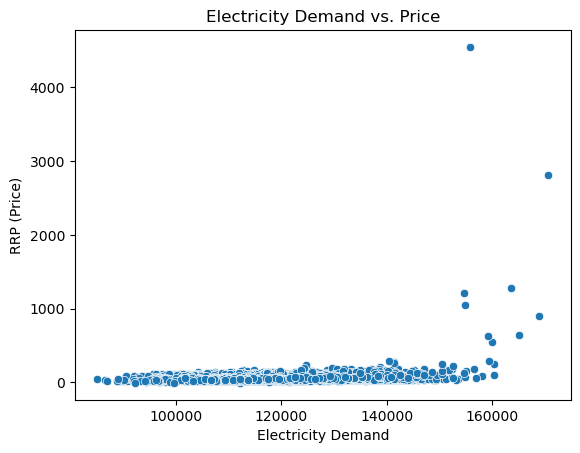

In [6]:
import seaborn as sns
sns.scatterplot(x=df['demand'], y=df['RRP'])
plt.xlabel("Electricity Demand")
plt.ylabel("RRP (Price)")
plt.title("Electricity Demand vs. Price")
plt.show()

### 2️) Weather Impact Analysis

##### a) Correlation Between Demand and Temperature

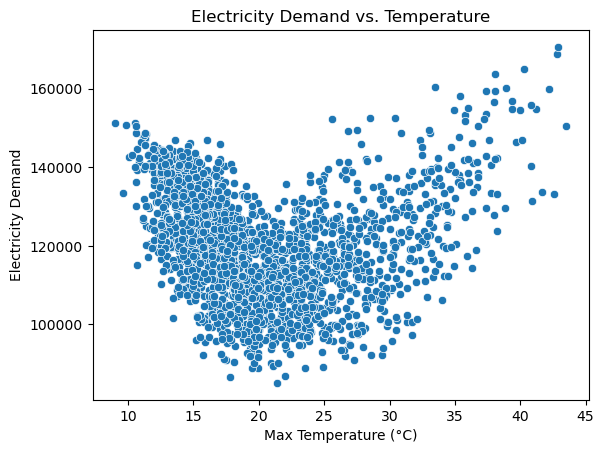

In [11]:
sns.scatterplot(x=df['max_temperature'], y=df['demand'])
plt.xlabel("Max Temperature (°C)")
plt.ylabel("Electricity Demand")
plt.title("Electricity Demand vs. Temperature")
plt.show()

##### b) Impact of Rainfall on Demand

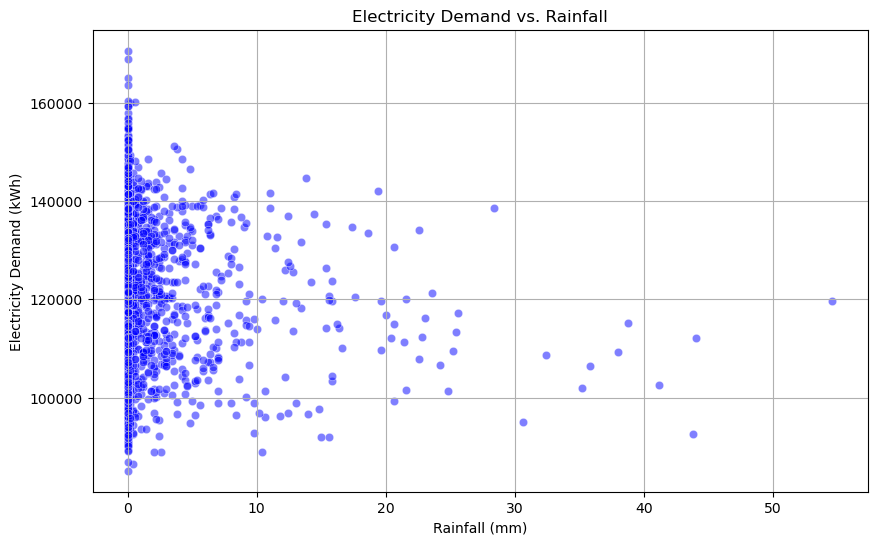

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['rainfall'], y=df['demand'], alpha=0.5, color="blue")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Electricity Demand (kWh)")
plt.title("Electricity Demand vs. Rainfall")
plt.grid(True)
plt.show()


### 3) Operational Efficiency & Special Event Analysis

 ##### a) Effect of Holidays & School Days

C:\Users\thota\AppData\Local\Temp\ipykernel_10620\180118434.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['holiday'], y=df['demand'], ci=None, palette="coolwarm")
2025-02-18 19:13:27,738 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\thota\AppData\Local\Temp\ipykernel_10620\180118434.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['holiday'], y=df['demand'], ci=None, palette="coolwarm")
2025-02-18 19:13:27,740 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plot

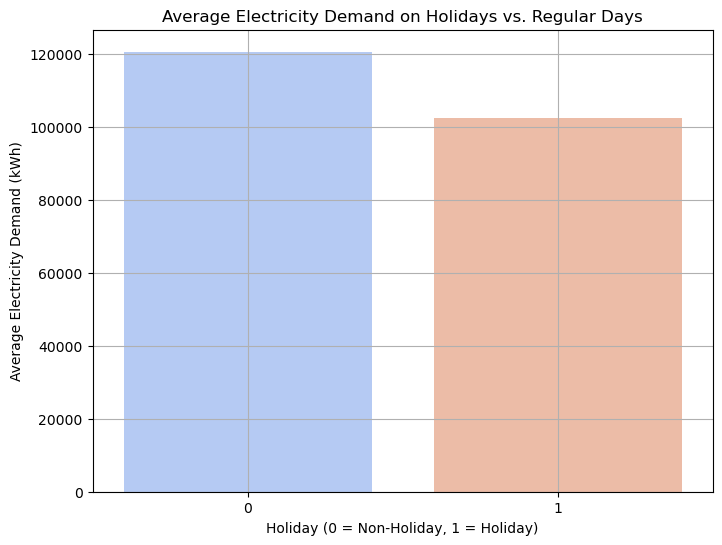

In [31]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['holiday'], y=df['demand'], ci=None, palette="coolwarm")
plt.xlabel("Holiday (0 = Non-Holiday, 1 = Holiday)")
plt.ylabel("Average Electricity Demand (kWh)")
plt.title("Average Electricity Demand on Holidays vs. Regular Days")
plt.grid(True)
plt.show()

### 4) Anomaly Detection & Outlier Analysis

##### a) Identifying Outliers with a Boxplot

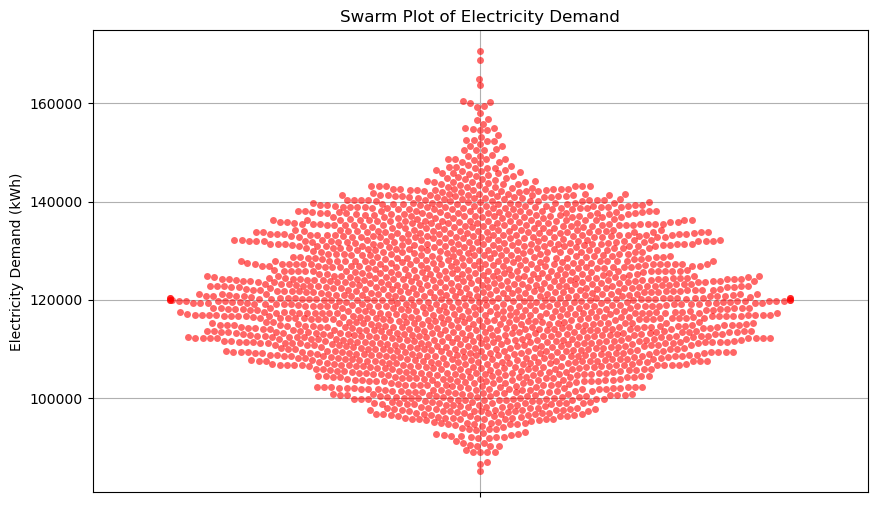

In [32]:
plt.figure(figsize=(10,6))
sns.swarmplot(y=df['demand'], color="red", alpha=0.6)
plt.title("Swarm Plot of Electricity Demand")
plt.ylabel("Electricity Demand (kWh)")
plt.grid(True)
plt.show()

##### b) Finding Outliers Using Z-score

In [15]:
from scipy import stats

df['z_scores'] = stats.zscore(df['demand'])
outliers = df[df['z_scores'].abs() > 3] 
print(outliers[['date', 'demand']])

           date      demand
1114 2018-01-19  165070.595
1485 2019-01-25  168894.845
1520 2019-03-01  163682.040
1856 2020-01-31  170653.840


### 5️) Revenue & Cost Optimization Opportunities

##### a) Analyzing Negative Prices (RRP Negative)

In [16]:
negative_prices = df[df['RRP_negative'] < 0]
print(negative_prices[['date', 'RRP_negative', 'demand']])

           date  RRP_negative      demand
0    2015-01-01     -7.240000   99635.030
1    2015-01-02    -47.809777  129606.010
6    2015-01-07     -1.100000  153514.820
17   2015-01-18   -148.260000   97728.750
43   2015-02-13   -318.660000  136070.620
...         ...           ...         ...
2100 2020-10-01    -24.426925  106641.790
2101 2020-10-02    -30.173823   99585.835
2102 2020-10-03    -33.538025   92277.025
2103 2020-10-04     -0.163066   94081.565
2104 2020-10-05     -6.511550  113610.030

[181 rows x 3 columns]


##### b) Time-Series Line Plot

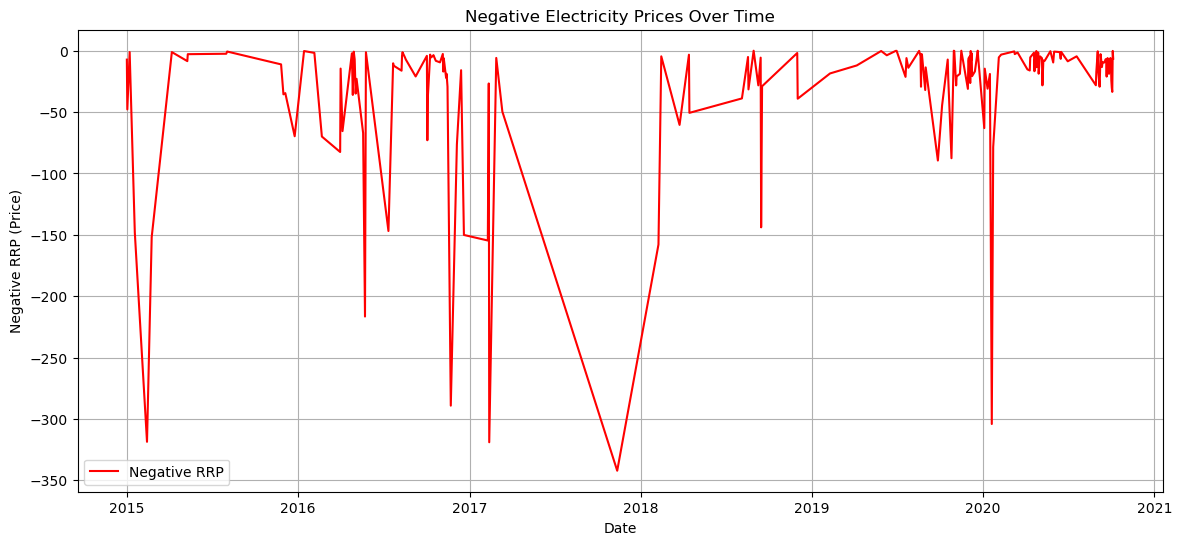

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.plot(negative_prices['date'], negative_prices['RRP_negative'], label="Negative RRP", color="red")
plt.xlabel("Date")
plt.ylabel("Negative RRP (Price)")
plt.title("Negative Electricity Prices Over Time")
plt.grid(True)
plt.legend()
plt.show()

##### c)  Scatter Plot (Negative Prices vs. Demand)

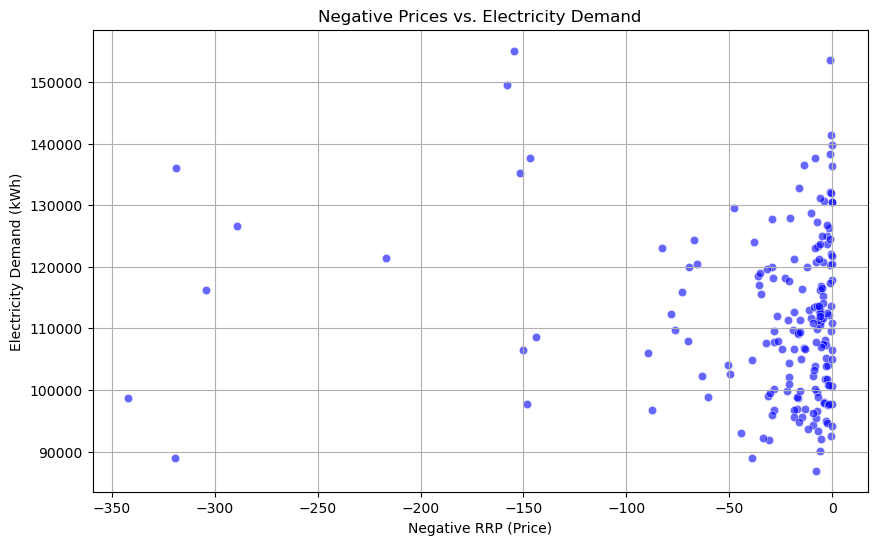

In [11]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(x=negative_prices['RRP_negative'], y=negative_prices['demand'], color="blue", alpha=0.6)
plt.xlabel("Negative RRP (Price)")
plt.ylabel("Electricity Demand (kWh)")
plt.title("Negative Prices vs. Electricity Demand")
plt.grid(True)
plt.show()

### 6️) Advanced Temporal Feature Analysis

##### a) Adding Time-Based Features for Forecasting

In [13]:
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['week_of_year'] = df['date'].dt.isocalendar().week
print(df[['date', 'day_of_week', 'month', 'week_of_year']].head())

        date  day_of_week  month  week_of_year
0 2015-01-01            3      1             1
1 2015-01-02            4      1             1
2 2015-01-03            5      1             1
3 2015-01-04            6      1             1
4 2015-01-05            0      1             2


##### b) Checking Demand Variations by Day of the Week

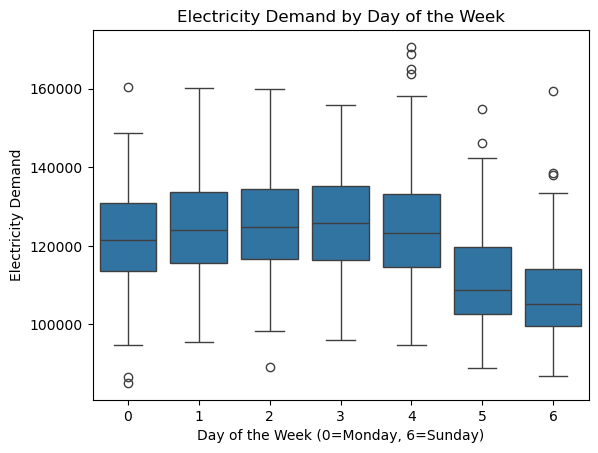

In [20]:
sns.boxplot(x=df['day_of_week'], y=df['demand'])
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Electricity Demand")
plt.title("Electricity Demand by Day of the Week")
plt.show()

### 7) Correlation Analysis (Identifying relationships)

C:\Users\thota\AppData\Local\Temp\ipykernel_10620\2388714591.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'N': 0, 'Y': 1}, inplace=True)


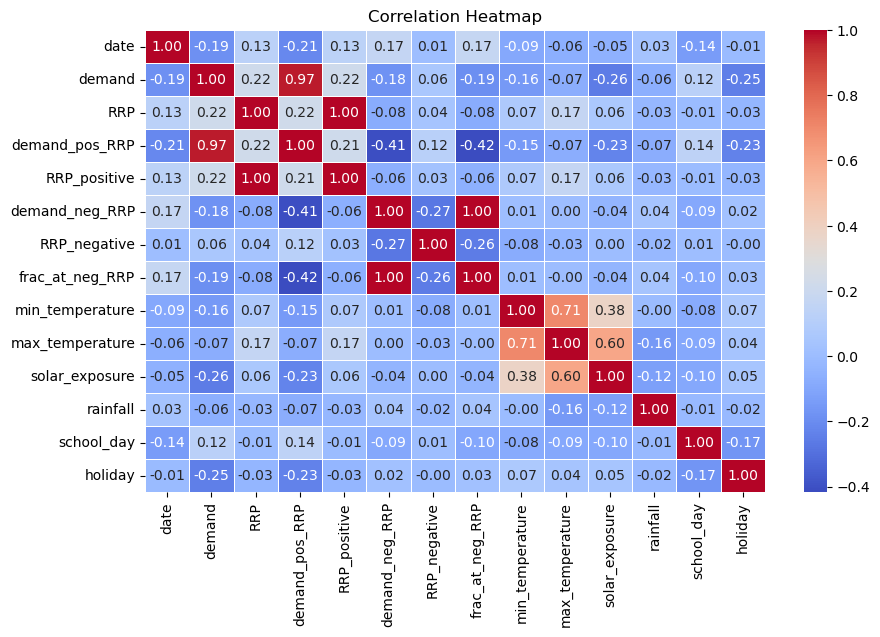

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "complete_dataset.csv"
df = pd.read_csv("complete_dataset.csv")

if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])


df.replace({'N': 0, 'Y': 1}, inplace=True)


corr_matrix = df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Step 4: Handling Missing Data

##### a) Checking for Missing Values

In [21]:
print(df.isnull().sum())

date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
z_scores           0
day_of_week        0
month              0
week_of_year       0
dtype: int64


##### b) Filling Missing Values

In [24]:
print(df.fillna(df.mean(), inplace=True))

None


## Overall Insights & Conclusion

##### 1) Demand Analysis shows seasonal trends, weekly patterns, and price-demand relationships, helping in energy demand forecasting and load balancing.
##### 2) Weather Analysis highlights the impact of temperature and rainfall on electricity consumption, allowing better planning for climate-sensitive energy policies.
##### 3) Outlier Detection & Anomalies help identify unexpected demand spikes, power failures, or data errors, improving forecast accuracy.
##### 4) Negative Price Analysis provides cost-saving strategies for power companies and traders, helping them optimize electricity procurement and storage decisions.
##### 5) Feature Engineering prepares data for predictive modeling, enabling more accurate machine learning forecasts.